In [1]:


import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import sklearn
print("Scikit-learn version:", sklearn.__version__)
import pickle
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.24.3
pandas version: 2.0.3
matplotlib version: 3.7.2
Scikit-learn version: 1.3.0


In [2]:
df = pd.read_csv('merged_dataset.csv')
df.shape

(1943, 10)

In [3]:
df.HeartDisease.value_counts() # df.target.unique()

HeartDisease
1    1034
0     909
Name: count, dtype: int64

In [4]:
df.head(3)

df.drop(columns=['ST_Slope'], inplace=True)

In [5]:
disease = len(df[df['HeartDisease'] == 1])
no_disease = len(df[df['HeartDisease']== 0])

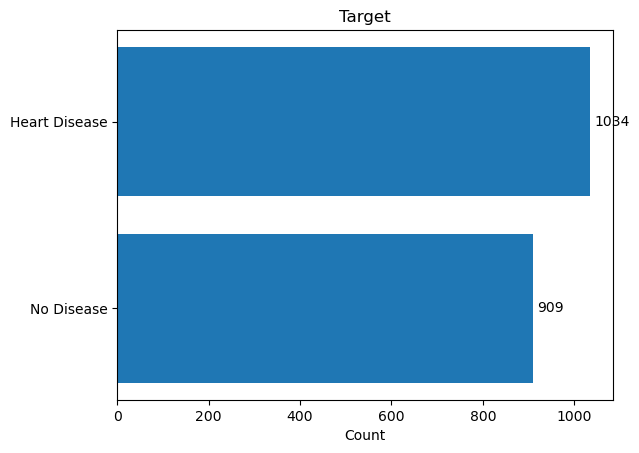

In [43]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

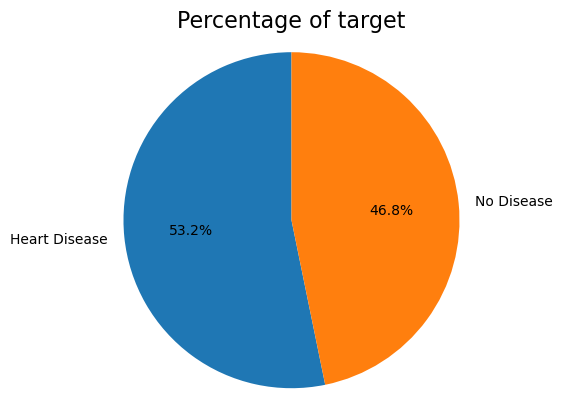

In [44]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [45]:
df.isnull().sum() # missing values

Age               0
Sex               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
HeartDisease      0
dtype: int64

In [46]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [47]:
qualitative


['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']

In [48]:
quantitative

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

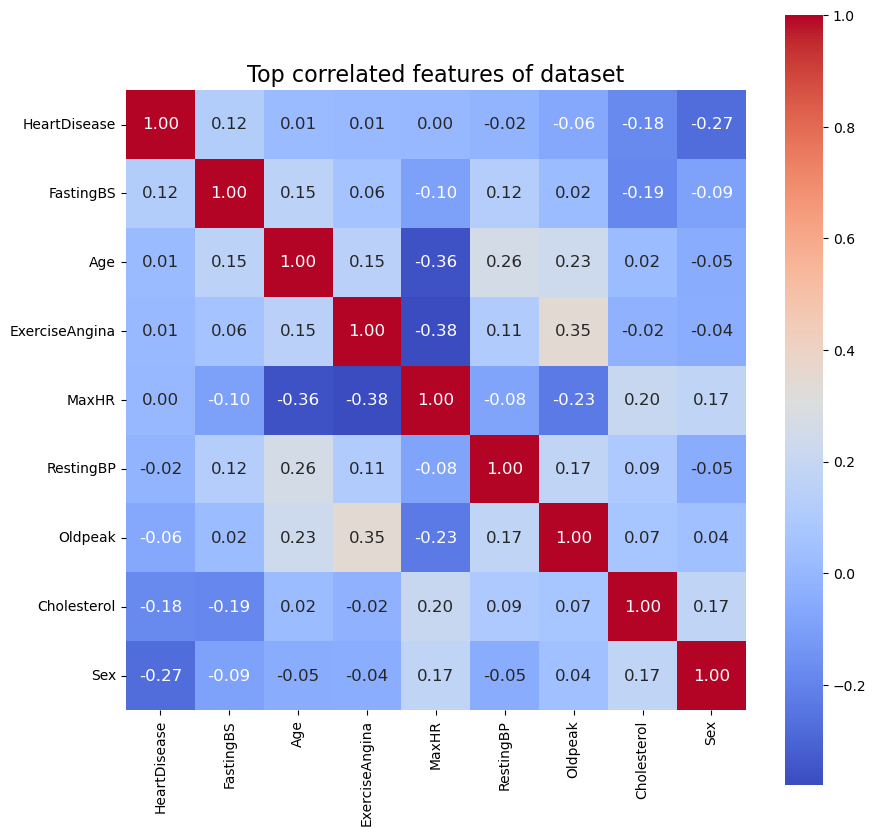

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [49]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'HeartDisease')['HeartDisease'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""

In [50]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1943, 8) (1943,)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (1748, 8) (1748,)
shape of X and y respectively (test) : (195, 8) (195,)


In [52]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression

# Define the best parameters
best_params = {'C': 1, 'solver': 'lbfgs', 'max_iter': 1000}

# Create LogisticRegression with best parameters
model = LogisticRegression(**best_params)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate and print training score
score_train = model.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_test = model.score(X_test, y_test)
print('Testing Score:', score_test)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


Logistic Regression
Training Score: 0.6292906178489702
Testing Score: 0.6615384615384615
% of people predicted with heart-disease: 0.5230769230769231
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        81
           1       0.74      0.66      0.69       114

    accuracy                           0.66       195
   macro avg       0.66      0.66      0.66       195
weighted avg       0.67      0.66      0.66       195



In [53]:
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with the best parameters
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
decision_tree = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
Y_pred = decision_tree.predict(X_test)

# Calculate and print training score
train_score = decision_tree.score(X_train, y_train)
print('Training Score:', train_score)

# Calculate and print testing score
score_dtc = decision_tree.score(X_test, y_test)
print('Testing Score:', score_dtc)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


DecisionTreeClassifier
Training Score: 0.9227688787185355
Testing Score: 0.8205128205128205
% of people predicted with heart-disease: 0.5692307692307692
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        81
           1       0.86      0.83      0.84       114

    accuracy                           0.82       195
   macro avg       0.81      0.82      0.82       195
weighted avg       0.82      0.82      0.82       195



In [54]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with the best parameters
best_params = {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}
rf_model = RandomForestClassifier(**best_params)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
Y_pred = rf_model.predict(X_test)

# Calculate and print training score
score_train = rf_model.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_rfc = rf_model.score(X_test, y_test)
print('Testing Score:', score_rfc)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8974358974358975
% of people predicted with heart-disease: 0.5846153846153846
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        81
           1       0.91      0.91      0.91       114

    accuracy                           0.90       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.90      0.90      0.90       195



In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best parameters
best_params = {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

# Create KNeighborsClassifier with best parameters
best_knc = KNeighborsClassifier(**best_params)

# Fit the model to the training data
best_knc.fit(X_train, y_train)

# Make predictions on the testing data
Y_pred = best_knc.predict(X_test)

# Calculate and print training score
score_train = best_knc.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_knc = best_knc.score(X_test, y_test)
print('Testing Score:', score_knc)  # Here, score_knc is calculated

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


Training Score: 1.0
Testing Score: 0.764102564102564
% of people predicted with heart-disease: 0.5538461538461539
              precision    recall  f1-score   support

           0       0.70      0.75      0.73        81
           1       0.81      0.77      0.79       114

    accuracy                           0.76       195
   macro avg       0.76      0.76      0.76       195
weighted avg       0.77      0.76      0.77       195



Testing Score for Logistic Regression: 0.6615384615384615


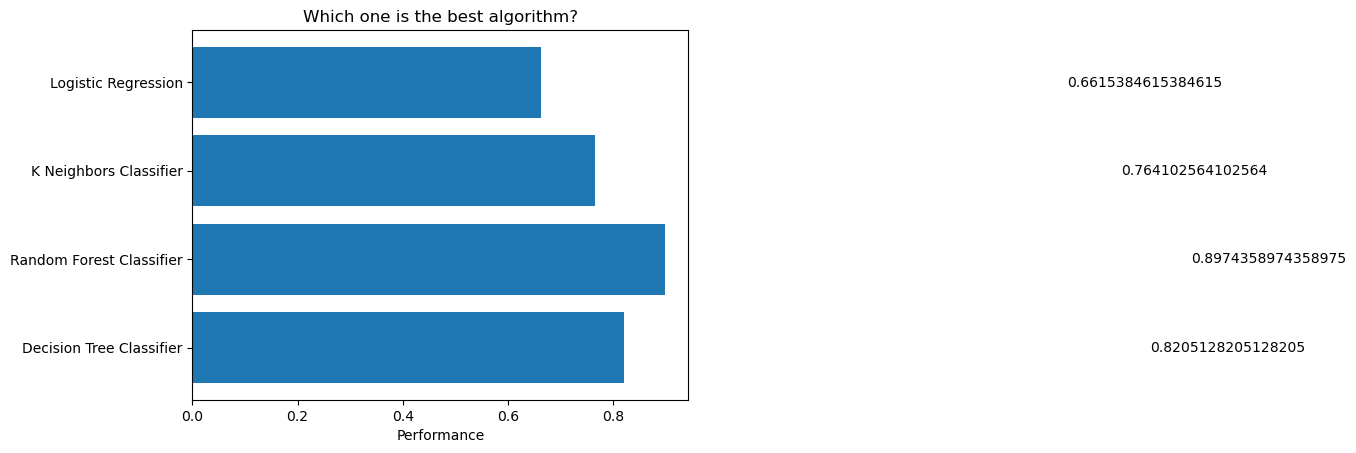

In [56]:
# Calculate and print testing score for Logistic Regression
score_logreg = model.score(X_test, y_test)
print('Testing Score for Logistic Regression:', score_logreg)

# Now you can plot the scores
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()


In [57]:
# Calculate and print testing score for Logistic Regression
score_logreg = model.score(X_test, y_test)
print('Testing Score for Logistic Regression:', score_logreg)

# Calculate and print testing score for Decision Tree Classifier
score_dtc = decision_tree.score(X_test, y_test)
print('Testing Score for Decision Tree Classifier:', score_dtc)

# Calculate and print testing score for Random Forest Classifier
score_rfc = rf_model.score(X_test, y_test)
print('Testing Score for Random Forest Classifier:', score_rfc)

# Calculate and print testing score for K Neighbors Classifier
score_knc = best_knc.score(X_test, y_test)
print('Testing Score for K Neighbors Classifier:', score_knc)

# Now compare the scores to find the best classifier
best_score = score_logreg
best_classifier = 'Logistic Regression'

if score_dtc > best_score:
    best_score = score_dtc
    best_classifier = 'Decision Tree Classifier'

if score_rfc > best_score:
    best_score = score_rfc
    best_classifier = 'Random Forest Classifier'

if score_knc > best_score:
    best_score = score_knc
    best_classifier = 'K Neighbors Classifier'

# Print the best classifier and its score
print("Best Classifier:", best_classifier)
print("Score:", best_score)


Testing Score for Logistic Regression: 0.6615384615384615
Testing Score for Decision Tree Classifier: 0.8205128205128205
Testing Score for Random Forest Classifier: 0.8974358974358975
Testing Score for K Neighbors Classifier: 0.764102564102564
Best Classifier: Random Forest Classifier
Score: 0.8974358974358975


In [58]:
results=pd.DataFrame(columns=['score'])
results.loc['Logistic Regression']=[score_logreg]
results.loc['Decision Tree Classifier']=[score_dtc]
results.loc['Random Forest Classifier']=[score_rfc]
results.loc['K-Neighbors Classifier']=[score_knc]

In [59]:
results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])

,score
Random Forest Classifier,0.897436
Decision Tree Classifier,0.820513
K-Neighbors Classifier,0.764103
Logistic Regression,0.661538


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solvers to optimize loss function
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_model.predict(X_test)
accuracy = best_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Testing Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Testing Accuracy: 0.6615384615384615
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        81
           1       0.74      0.66      0.69       114

    accuracy                           0.66       195
   macro avg       0.66      0.66      0.66       195
weighted avg       0.67      0.66      0.66       195



In [61]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [62]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier()

# Initialize GridSearchCV with the parameter grid and cross-validation settings
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Use the best model found by grid search for predictions
best_rf_model = grid_search.best_estimator_
Y_pred = best_rf_model.predict(X_test)

# Calculate and print training score
train_score = best_rf_model.score(X_train, y_train)
print('Training Score:', train_score)

# Calculate and print testing score
test_score = best_rf_model.score(X_test, y_test)
print('Testing Score:', test_score)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


RandomForestClassifier
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Score: 1.0
Testing Score: 0.8923076923076924
% of people predicted with heart-disease: 0.6
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        81
           1       0.90      0.92      0.91       114

    accuracy                           0.89       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.89      0.89      0.89       195



In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Values to try for the number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithms to use
}

# Create the grid search object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found by grid search
best_knc = grid_search.best_estimator_

# Use the best model to make predictions
Y_pred = best_knc.predict(X_test)

# Calculate and print training score
score_train = best_knc.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_test = best_knc.score(X_test, y_test)
print('Testing Score:', score_test)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Training Score: 1.0
Testing Score: 0.764102564102564
% of people predicted with heart-disease: 0.5538461538461539
              precision    recall  f1-score   support

           0       0.70      0.75      0.73        81
           1       0.81      0.77      0.79       114

    accuracy                           0.76       195
   macro avg       0.76      0.76      0.76       195
weighted avg       0.77      0.76      0.77       195



In [65]:
import pickle

# Assuming `best_rf_model` is the trained RandomForestClassifier model
# Save the model to a file
with open('rf_model.pkl2', 'wb') as file:
    pickle.dump(best_rf_model, file)

# Check if there are any errors
print("Model loaded successfully!")


Model loaded successfully!


In [6]:
df.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,0,140,289,0,172,0,0.0,0
1,49,1,160,180,0,156,0,1.0,1
2,37,0,130,283,0,98,0,0.0,0
3,48,1,138,214,0,108,1,1.5,1
4,54,0,150,195,0,122,0,0.0,0
5,39,0,120,339,0,170,0,0.0,0
6,45,1,130,237,0,170,0,0.0,0
7,54,0,110,208,0,142,0,0.0,0
8,37,0,140,207,0,130,1,1.5,1
9,48,1,120,284,0,120,0,0.0,0
